<a href="https://colab.research.google.com/github/kanikaKanu90/notebook/blob/master/CLass_map_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# “Grad-CAM: Visual
# Explanations from Deep Networks via Gradient-based Localization.”2 It’s very simple:
# it consists of taking the output feature map of a convolution layer, given an input
# image, and weighing every channel in that feature map by the gradient of the class
# with respect to the channel. Intuitively, one way to understand this trick is that you’re
# weighting a spatial map of “how intensely the input image activates different channels”
# by “how important each channel is with regard to the class,” resulting in a spatial
# map of “how intensely the input image activates the class.”

from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
model._make_predict_function()
model.summary()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________

In [26]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/content/sample_data/images.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

x

array([[[[133.061   ,  94.221   ,  71.32    ],
         [133.061   ,  94.221   ,  71.32    ],
         [133.061   ,  94.221   ,  71.32    ],
         ...,
         [135.061   ,  96.221   ,  73.32    ],
         [134.061   ,  95.221   ,  72.32    ],
         [134.061   ,  95.221   ,  72.32    ]],

        [[133.061   ,  94.221   ,  71.32    ],
         [133.061   ,  94.221   ,  71.32    ],
         [133.061   ,  94.221   ,  71.32    ],
         ...,
         [135.061   ,  96.221   ,  73.32    ],
         [134.061   ,  95.221   ,  72.32    ],
         [134.061   ,  95.221   ,  72.32    ]],

        [[133.061   ,  94.221   ,  71.32    ],
         [133.061   ,  94.221   ,  71.32    ],
         [133.061   ,  94.221   ,  71.32    ],
         ...,
         [134.061   ,  95.221   ,  72.32    ],
         [134.061   ,  95.221   ,  72.32    ],
         [134.061   ,  95.221   ,  72.32    ]],

        ...,

        [[ 41.060997,  72.221   ,  58.32    ],
         [ 38.060997,  69.221   ,  55.32    ]

In [27]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=240)[0])


Predicted: [('n02504458', 'African_elephant', 0.8280071), ('n01871265', 'tusker', 0.15320127), ('n02504013', 'Indian_elephant', 0.018753855), ('n02408429', 'water_buffalo', 3.4451485e-05), ('n02397096', 'warthog', 1.2393873e-06), ('n02480855', 'gorilla', 4.6538716e-07), ('n01704323', 'triceratops', 3.4848145e-07), ('n02410509', 'bison', 2.8714499e-07), ('n02113978', 'Mexican_hairless', 1.4210424e-07), ('n02403003', 'ox', 1.0278924e-07), ('n02109047', 'Great_Dane', 6.8133936e-08), ('n02092339', 'Weimaraner', 6.66547e-08), ('n02481823', 'chimpanzee', 5.3239972e-08), ('n02486410', 'baboon', 4.886879e-08), ('n11879895', 'rapeseed', 4.7869317e-08), ('n02437312', 'Arabian_camel', 4.4631538e-08), ('n02396427', 'wild_boar', 3.201521e-08), ('n04604644', 'worm_fence', 2.948384e-08), ('n02395406', 'hog', 2.2474529e-08), ('n02113799', 'standard_poodle', 2.1590141e-08), ('n02412080', 'ram', 2.091487e-08), ('n02099267', 'flat-coated_retriever', 1.6466162e-08), ('n03868242', 'oxcart', 1.6189187e-08),

In [ ]:
preds[0]

In [29]:
np.argmax(preds[0])
# The entry in the prediction vector that was maximally activated is
# the one corresponding to the “African elephant” class, at index 386:

386

In [30]:
 african_elephant_output= model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3') # output FMap of last layer of the model wit 512 filters

In [31]:
last_conv_layer.output, last_conv_layer.output_shape

(<tf.Tensor 'block5_conv3/Relu:0' shape=(None, 14, 14, 512) dtype=float32>,
 (None, 14, 14, 512))

In [32]:
# from tensorflow.Keras import backend as K
import keras.backend as K
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# Gradient of the “African
# elephant” class with regard to
# the output feature map of
# block5_conv3

In [38]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))
pooled_grads[0]

<tf.Tensor 'strided_slice_3:0' shape=() dtype=float32>

In [ ]:
# iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]]) 

# compute loss and gradient tensor for an image

pooled_grads_value, conv_layer_output_value = iterate([x])

pooled_grads_value, conv_layer_output_value

In [37]:
# Multiplies each channel in the feature-map array by “how important this channel is” with regard to the “elephant” class

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# The channel-wise mean of the resulting feature map is the heatmap of theclass activation.

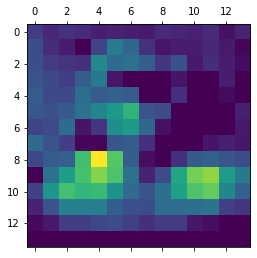

In [41]:
import matplotlib.pyplot as plt

# heatmap for the
# class “dog,” indicating how dog-like parts of the image are.

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

# Normalize heat map - postprocessing


In [44]:
# Superimposing the heatmap with the original picture

import cv2

img = cv2.imread("/content/sample_data/images.jpg")
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap) #convert the haetmap to RGB
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) #apply heat map to original image

superimposed_img = heatmap * 0.4 + img #heatmap intensity factor

superimposed_img

cv2.imwrite('/content/sample_data/superimposed.jpg', superimposed_img)

True